## DataFrame Creation from Dataset 


### Introduction 

This notebook includes the steps to load the .json files contianing the review data as well as the metadata for each product. It also performs some initial data cleaning such as removing duplicate columns from the dataset and removal of columns with null values. Lastly, initial feature engineering was introduced to identify when the reviews were posted. 


### Dataset 

The dataset that will be used is Amazon Review Data published by UCSD. The entire dataset contains 233 million reviews across 29 categories. For the purpose of this project, a subset of the data from one category (Grocery and Gourmet Food) will be used to perform the analysis. This subset of the data contains 1,143,860 total reviews from 41,320 products, with each of the products having at least 5 reviews 

Link for dataset: https://nijianmo.github.io/amazon/index.html#code

### Output 
Dataframe with the text review, star-rating, and department will be pickled for further cleaning and analysis




In [36]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# load the file with review data

data = []
with open('Grocery_and_Gourmet_Food_5.json', 'r') as f:
    for l in tqdm(f):
        data.append(json.loads(l))

In [38]:
# show an example of the review data 
print(data[0])

{'overall': 5.0, 'verified': True, 'reviewTime': '11 19, 2014', 'reviewerID': 'A1QVBUH9E1V6I8', 'asin': '4639725183', 'reviewerName': 'Jamshed Mathur', 'reviewText': 'No adverse comment.', 'summary': 'Five Stars', 'unixReviewTime': 1416355200}


In [39]:
# transform the data into a Pandas dataframe 

r_df = pd.DataFrame.from_dict(data)
print("There are:",len(r_df), "reviews in the dataset")
r_df.head()

There are: 1143860 reviews in the dataset


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5.0,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5.0,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5.0,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5.0,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN


In [40]:
# load the product data containing the product specifications 

m_data = []
with open('meta_Grocery_and_Gourmet_Food.json', 'r') as m:
    for l in tqdm(m):
        m_data.append(json.loads(l))

In [41]:
# show an example of the metadata 

print(m_data[0])

{'category': ['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda'], 'tech1': '', 'description': ['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.'], 'fit': '', 'title': 'Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs', 'also_buy': [], 'image': [], 'tech2': '', 'brand': 'Ariola Imports', 'feature': [], 'rank': '165,181 in Grocery & Gourmet Food (', 'also_view': ['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY'], 'main_cat': 'Grocery', 'similar_item': '', 'date': '', 'price': '$41.91', 'asin': '0681727810'}


In [42]:
# transform the metadata into a Pandas dataframe 

m_df = pd.DataFrame.from_dict(m_data)
print("There are:",len(m_df), "entries in the metadata")
m_df.head()

There are: 287051 entries in the metadata


,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",[https://images-na.ssl-images-amazon.com/image...,,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,NaN
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,NaN
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,NaN
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,NaN


In [43]:
# show all the columns in the metadata 

m_df.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'details'],
      dtype='object')

In [44]:
# find the duplicates in the metadata file and drop the earlier entries if there are duplicates 

m_df2 = m_df.drop_duplicates(subset=['asin'], keep='last')
print('There are', len(m_df)-len(m_df2), 'duplicates asin info in meta_data')

There are 3697 duplicates asin info in meta_data


In [45]:
# # code to look at what the duplicate items are 

# pd.concat(g for _, g in m_df.groupby("asin") if len(g) > 1)

In [46]:
#left join the reviews df and metadata df to get the category of the food 

merged_df = pd.merge(left=r_df, right=m_df2, how='left', left_on='asin', right_on='asin')
len(merged_df) # number of entries after joining the df's matches before the join 

1143860

In [47]:
# take a look at the merged df

merged_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,details
0,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,...,,Lipton,[],"15,487 in Grocery & Gourmet Food (","[B000JSQDK4, B007ZI1SKG, B00286KM8E, B01LY2304...",Grocery,,,$12.98,NaN
1,5.0,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,...,,Lipton,[],"15,487 in Grocery & Gourmet Food (","[B000JSQDK4, B007ZI1SKG, B00286KM8E, B01LY2304...",Grocery,,,$12.98,NaN
2,5.0,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,...,,Lipton,[],"15,487 in Grocery & Gourmet Food (","[B000JSQDK4, B007ZI1SKG, B00286KM8E, B01LY2304...",Grocery,,,$12.98,NaN
3,5.0,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,...,,Lipton,[],"15,487 in Grocery & Gourmet Food (","[B000JSQDK4, B007ZI1SKG, B00286KM8E, B01LY2304...",Grocery,,,$12.98,NaN
4,5.0,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,...,,Lipton,[],"15,487 in Grocery & Gourmet Food (","[B000JSQDK4, B007ZI1SKG, B00286KM8E, B01LY2304...",Grocery,,,$12.98,NaN


In [48]:
# show all the columns in the merged df

merged_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image_x', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'image_y', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'details'],
      dtype='object')

In [49]:
# check for null values in the merged df 

merged_df.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          138
reviewText            390
summary               219
unixReviewTime          0
vote               985658
style              551774
image_x           1134350
category              797
tech1                 797
description           797
fit                   797
title                 797
also_buy              797
image_y               797
tech2                 797
brand                 797
feature               797
rank                  797
also_view             797
main_cat              797
similar_item          797
date                  797
price                 797
details               848
dtype: int64

In [50]:
# feature engineering: extract the department (the second elements in the column 'category'); 
# extract the year, month, and day of the reviews 

merged_df['department'] = merged_df['category'].str[1]
merged_df['date'], merged_df['year'] = merged_df['reviewTime'].str.split(',', 1).str
merged_df['month'], merged_df['day']= merged_df['date'].str.split(' ', 1).str
merged_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image_x', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'image_y', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'details', 'department',
       'year', 'month', 'day'],
      dtype='object')

In [51]:
# check how many reviews each department has 

print(merged_df['department'].value_counts())

Beverages                             301360
Cooking & Baking                      223278
Snack Foods                           141916
Candy & Chocolate                     122453
Herbs, Spices & Seasonings             74641
Breakfast Foods                        54210
Canned, Jarred & Packaged Foods        41164
Produce                                26631
Soups, Stocks & Broths                 23930
Sauces, Gravies & Marinades            21062
Jams, Jellies & Sweet Spreads          20521
Dairy, Cheese & Eggs                   15092
Dried Beans, Grains & Rice             14213
Pasta & Noodles                        11615
Condiments & Salad Dressings           11254
Food & Beverage Gifts                  10079
Breads & Bakery                         9285
Meat & Seafood                          6137
Frozen                                  4304
Olives, Pickles & Relishes              3696
Fresh Flowers & Live Indoor Plants      3018
Prepared Foods                          1325
Meat Subst

In [52]:
# find out the total number of departments 

print('Thre are', len(merged_df['department'].unique()),'departments in total')

Thre are 26 departments in total


In [53]:
print('The total number of products being reviewed is', merged_df['asin'].nunique())
print('The total number of reviewers is', merged_df['reviewerID'].nunique())

The total number of products being reviewed is 41320
The total number of reviewers is 127496


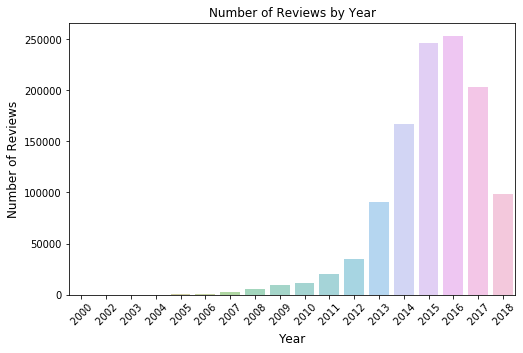

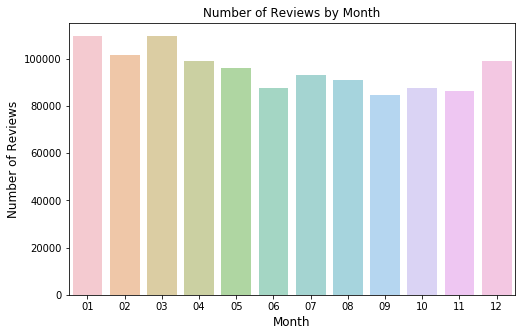

In [56]:
# print("Number of reviews from each year","\n", merged_df['year'].value_counts().sort_index(ascending=False))

year_count  = merged_df['year'].value_counts().sort_index()
sns.barplot(year_count.index, year_count.values, alpha=0.5)
plt.title('Number of Reviews by Year')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation = 45)
plt.show()


# print("Number of reviews from each month","\n",merged_df['month'].value_counts().sort_index())

month_count  = merged_df['month'].value_counts().sort_index()
sns.barplot(month_count.index, month_count.values, alpha=0.5)
plt.title('Number of Reviews by Month')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [57]:
# remove reviews before 2012 since they are too outdated 

merged_df = merged_df[(merged_df['year'].astype(int))> 2012]  
print(merged_df['year'].value_counts().sort_index(ascending=False))

 2018     98253
 2017    203536
 2016    253463
 2015    246606
 2014    166589
 2013     90580
Name: year, dtype: int64


In [58]:
# create df used to text mining, check for null values 

final_df = merged_df[['overall', 'reviewText', 'department']]
print(final_df.isnull().sum())
print(len(final_df))

overall         0
reviewText    390
department    662
dtype: int64
1059027


In [59]:
# remove null values 

final_df.dropna(inplace= True)
print(final_df.isnull().sum())
print(len(final_df))

/usr/local/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


overall       0
reviewText    0
department    0
dtype: int64
1057975


In [60]:
# pickle final df for later use 

final_df.to_pickle("reviews.pkl")